<a href="https://colab.research.google.com/github/Ph1so/Binary-Classification-with-a-Software-Defects-Dataset/blob/main/Binary_Classification_with_a_Software_Defects_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
#create kaggle folder
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle competitions download -c playground-series-s3e23
!unzip playground-series-s3e23

In [ ]:
!pip install tensorflow tensorflow_decision_forests

In [44]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split

# Modules of Machine Learning Models
from sklearn.linear_model import LogisticRegression # Logistic Regression model class
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier class
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier class

# Modules for prediction evaluations
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

# Import and understand data

In [46]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.drop('id', axis = 1, inplace = True)
id = df_test['id']
df_test.drop('id',axis = 1, inplace = True)
y = df_train['defects']


In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [23]:
y_train_series = df_train['defects'].squeeze()
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_series)
y_train_encoded_df = pd.DataFrame(y_train_encoded, columns=['Encoded_Target'])

df_train['defects'] = y_train_encoded_df


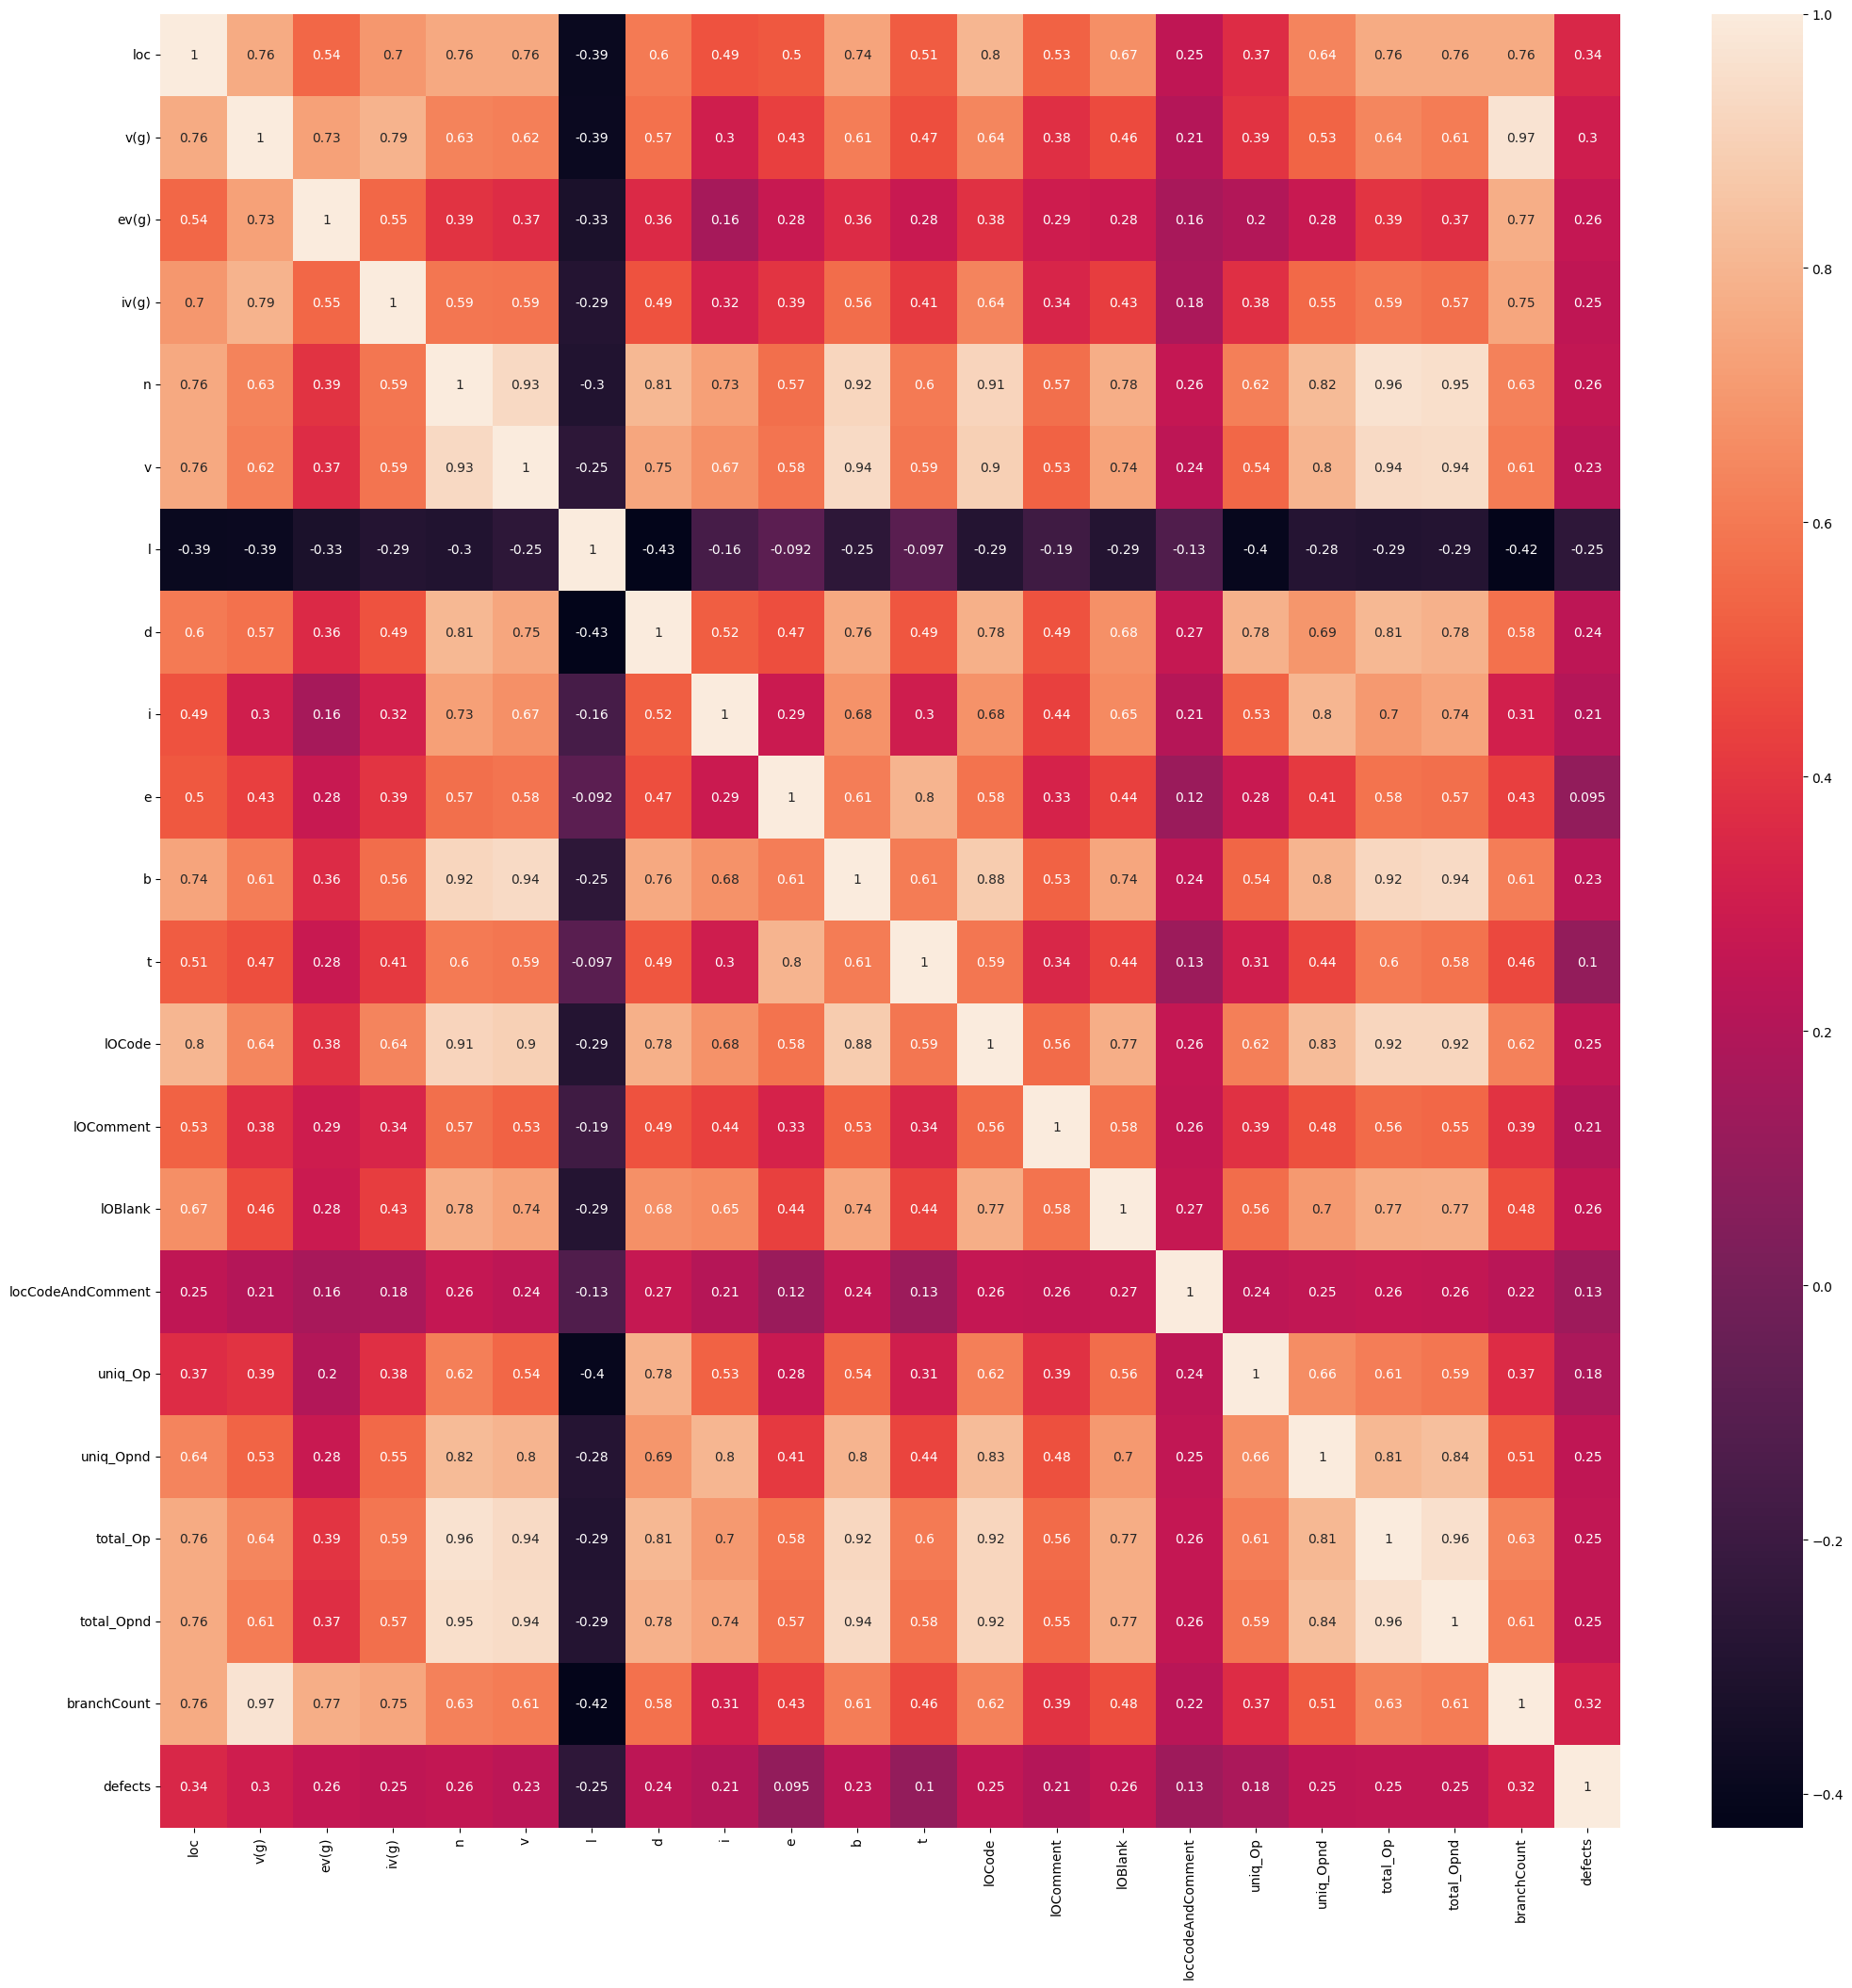

In [15]:
plt.subplots(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [18]:
df_train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [47]:
df_train.drop('defects', axis = 1, inplace = True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.33, random_state=42)

# Training

Logistic Regression

In [49]:
log = LogisticRegression()
log.fit(X_train, y_train)
logp = log.predict(X_test)

Random Forest Classifier

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfcp = rfc.predict(X_test)

K-Neighbors Classifier

In [54]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
kncp = knc.predict(X_test)

# Evaluation

Logistic Regression

              precision    recall  f1-score   support

       False       0.82      0.93      0.87     26028
        True       0.54      0.29      0.38      7554

    accuracy                           0.79     33582
   macro avg       0.68      0.61      0.62     33582
weighted avg       0.76      0.79      0.76     33582

 ROC-AUC Score: 0.6094
 Accuracy Score: 0.7857
 Recall Score: 0.289
 Precision Score: 0.5445
 F1-score: 0.3776


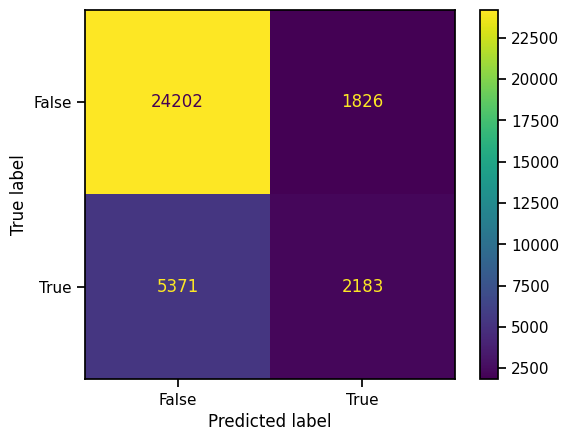

In [51]:
print(classification_report(y_test, logp))
lr_cm = confusion_matrix(y_test, logp)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = log.classes_).plot()

roc_auc = round(roc_auc_score(y_test, logp), 4)
accuracy = round(accuracy_score(y_test, logp), 4)
recall = round(recall_score(y_test, logp), 4)
precision = round(precision_score(y_test, logp), 4)
f_one = round(f1_score(y_test, logp), 4)

print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

Random Forest Classifier

              precision    recall  f1-score   support

       False       0.84      0.93      0.88     26028
        True       0.63      0.38      0.47      7554

    accuracy                           0.81     33582
   macro avg       0.73      0.66      0.68     33582
weighted avg       0.79      0.81      0.79     33582

 ROC-AUC Score: 0.6574
 Accuracy Score: 0.8097
 Recall Score: 0.3803
 Precision Score: 0.6272
 F1-score: 0.4735


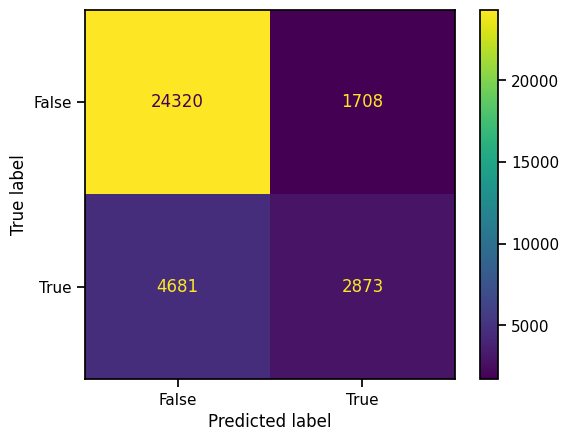

In [53]:
print(classification_report(y_test, rfcp))
lr_cm = confusion_matrix(y_test, rfcp)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = rfc.classes_).plot()

roc_auc = round(roc_auc_score(y_test, rfcp), 4)
accuracy = round(accuracy_score(y_test, rfcp), 4)
recall = round(recall_score(y_test, rfcp), 4)
precision = round(precision_score(y_test, rfcp), 4)
f_one = round(f1_score(y_test, rfcp), 4)

print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

K-Neighbors Classifier

              precision    recall  f1-score   support

       False       0.83      0.91      0.87     26028
        True       0.54      0.38      0.45      7554

    accuracy                           0.79     33582
   macro avg       0.69      0.64      0.66     33582
weighted avg       0.77      0.79      0.77     33582

 ROC-AUC Score: 0.6437
 Accuracy Score: 0.7882
 Recall Score: 0.381
 Precision Score: 0.5416
 F1-score: 0.4473


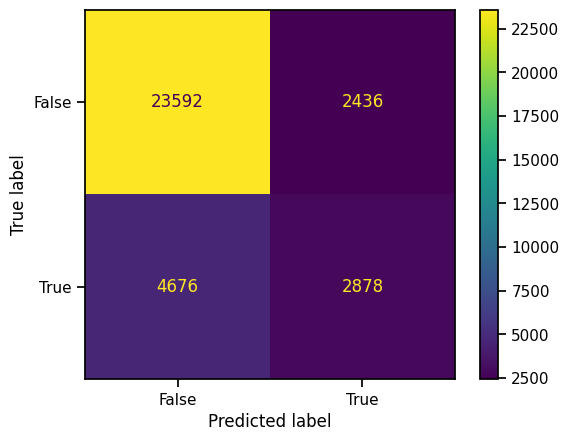

In [55]:
print(classification_report(y_test, kncp))
lr_cm = confusion_matrix(y_test, kncp)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = knc.classes_).plot()

roc_auc = round(roc_auc_score(y_test, kncp), 4)
accuracy = round(accuracy_score(y_test, kncp), 4)
recall = round(recall_score(y_test, kncp), 4)
precision = round(precision_score(y_test, kncp), 4)
f_one = round(f1_score(y_test, kncp), 4)

print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")